<a href="https://colab.research.google.com/github/kaliappan01/Exploring_ML_models/blob/main/MNIST_digit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,f1_score

In [2]:
get_data = fetch_openml('mnist_784')
%matplotlib inline

In [ ]:
get_data

In [4]:
features,label = get_data['data'],get_data['target']

In [5]:
features.shape

(70000, 784)

In [6]:
label.shape

(70000,)

(-0.5, 27.5, 27.5, -0.5)

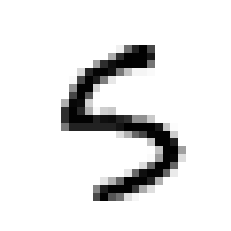

In [7]:
samp_digit = features[15000]
samp_digit_img = samp_digit.reshape(28,28)
plt.imshow(samp_digit_img,cmap=matplotlib.cm.binary,interpolation="nearest")
plt.axis("off")
#sample data 

In [8]:
label[15000] #verifying image
get_barrier = int(features.shape[0]*0.075)

In [9]:
feature_train,feature_test = features[:6000],features[6000:7000]
feature_train.shape

(6000, 784)

In [10]:
label_train,label_test = label[:6000],label[6000:7000]
label_test.shape

(1000,)

In [11]:
shuffle = np.random.permutation(get_barrier)
feature_train,label_train = feature_train[shuffle],label_train[shuffle]

In [12]:
#trying only for 5
print(label_test.shape)
train_5s = label_train=='5'
res_5s = label_test=='5'
#print(any(all_5s))

(1000,)


In [13]:
from sklearn.linear_model import LogisticRegression

In [14]:
my_log_r = LogisticRegression(solver='lbfgs',tol = 0.1,max_iter=200)
my_log_r.fit(feature_train,train_5s)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=200,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.1, verbose=0,
                   warm_start=False)

In [15]:
my_log_r.predict([samp_digit])

array([ True])

In [16]:
from sklearn.model_selection import cross_val_score
a =  cross_val_score(my_log_r,feature_train,train_5s,cv=3,scoring='accuracy')
print(a.mean())

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.9586666666666667


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [17]:
X_train, X_test, y_train, y_test = train_test_split(features, label, test_size=0.33,shuffle = True, random_state =144)

In [19]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm

DT_model = DecisionTreeClassifier()
DT_model.fit(X_train,y_train)


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [20]:
pred = DT_model.predict(X_test)


In [37]:
def evaluate(y_test,pred):
  print("Accuracy Score \n",accuracy_score(y_test, pred))
  con_mat = confusion_matrix(y_test,pred)
  print("Confusion Matrix \n",con_mat)
  print("Classification Report \n",classification_report(y_test,pred))
  print("F-1 score \n",f1_score(y_test,pred,average ="macro"))


In [38]:
evaluate(y_test, pred)

Accuracy Score 
 0.8675324675324675
Confusion Matrix 
 [[2156    3   33   19   14   38   34    6   30   18]
 [   1 2456   21    9    9   10   12   21   24    7]
 [  31   34 1956   53   29   33   29   37   70   27]
 [  21   30   61 1963   19  101   16   33   73   44]
 [  14    9   40   13 1976   15   50   18   50  107]
 [  42   20   26   89   29 1646   54   12   86   56]
 [  42   13   35   13   29   57 2011    2   44   15]
 [   8   15   58   36   33   10    6 2140   16   60]
 [  42   36   43   77   43   62   43   16 1783   55]
 [  21    9   30   48   82   38   13   44   86 1953]]
Classification Report 
               precision    recall  f1-score   support

           0       0.91      0.92      0.91      2351
           1       0.94      0.96      0.95      2570
           2       0.85      0.85      0.85      2299
           3       0.85      0.83      0.84      2361
           4       0.87      0.86      0.87      2292
           5       0.82      0.80      0.81      2060
           

In [29]:
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
X_train_sc = std_scaler.fit_transform(X_train)
X_test_sc = std_scaler.transform(X_test)

Standard scaler should be used only after splitting data into train & split  
Also the test data should be only transformed
while the training data should be fit_transform
Basically what fit does is it gets the normalized value for the variable 
we get this value using the following formula  
![standard scaling formula](https://www.atoti.io/wp-content/uploads/2021/01/1_6TnJHNoeu9ZSni1B94MZow.png)  
[Image source](https://www.atoti.io/wp-content/uploads/2021/01/1_6TnJHNoeu9ZSni1B94MZow.png)

In [30]:
svm_model = svm.SVC(C=1.0)
svm_model.fit(X_train_sc,y_train)
svm_pred = svm_model.predict(X_test_sc)

In [39]:
evaluate(y_test,svm_pred)

Accuracy Score 
 0.9614718614718615
Confusion Matrix 
 [[2306    0    8    3    2    4   14    6    7    1]
 [   0 2533   12    5    2    0    4    7    4    3]
 [   7    7 2200   10    8    0   13   35   16    3]
 [   0    6   32 2227    4   21    0   39   27    5]
 [   3    3   17    1 2211    4   13   10    2   28]
 [   4    5    7   30    9 1948   23   19    9    6]
 [   5    4    7    0    2   11 2211   17    4    0]
 [   2    9   12    8   11    1    0 2312    0   27]
 [   4   17   17   16    8   22    8   16 2086    6]
 [  11    5   13   14   35    8    2   52    8 2176]]
Classification Report 
               precision    recall  f1-score   support

           0       0.98      0.98      0.98      2351
           1       0.98      0.99      0.98      2570
           2       0.95      0.96      0.95      2299
           3       0.96      0.94      0.95      2361
           4       0.96      0.96      0.96      2292
           5       0.96      0.95      0.96      2060
           

In [33]:
from sklearn.ensemble import RandomForestClassifier
RF_model = RandomForestClassifier()
RF_model.fit(X_train,y_train)
RF_pred = RF_model.predict(X_test)

In [40]:
evaluate(y_test,RF_pred)

Accuracy Score 
 0.9660606060606061
Confusion Matrix 
 [[2321    0    2    2    2    1    5    1   15    2]
 [   0 2535   14    4    4    1    3    5    1    3]
 [  11    5 2206   12    9    2   11   22   18    3]
 [   2    3   33 2247    1   25    1   13   25   11]
 [   5    2    5    0 2230    0   19    2    3   26]
 [   6    4    4   27    7 1978   13    1   11    9]
 [   9    5    2    0    4   15 2223    0    3    0]
 [   2   10   23    2   14    0    0 2304    3   24]
 [   4   12   18   20    8   13   15    4 2084   22]
 [  16    6    9   28   28    7    3   19   20 2188]]
Classification Report 
               precision    recall  f1-score   support

           0       0.98      0.99      0.98      2351
           1       0.98      0.99      0.98      2570
           2       0.95      0.96      0.96      2299
           3       0.96      0.95      0.96      2361
           4       0.97      0.97      0.97      2292
           5       0.97      0.96      0.96      2060
           

Your value may differ since its Random Forest as the name suggests it uses different samples of training dataset to train the  
Random Forest is Bagging with Decision tree as the base model